# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
* 분석을 통해 가설을 검정해봅니다.

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 설정

In [2]:
import os

if os.name == "posix":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
%config InlineBackend.figure_format = "retina"

# 데이터 불러오기

In [4]:
df = pd.read_csv("../data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df.shape

(1000000, 34)

## 데이터 미리보기

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [7]:
df.sample()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
971771,2017,971772,1,17,45,165.0,55.0,80.0,1.0,0.3,...,67.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


# 기본정보 보기

In [8]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량 등을 봅니다
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
# 컬럼만 따로 출력합니다.
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [10]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 결측치 보기

In [11]:
# isnull을 통해 결측치를 bool 값으로 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [12]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 집계할 수 있습니다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

<Axes: >

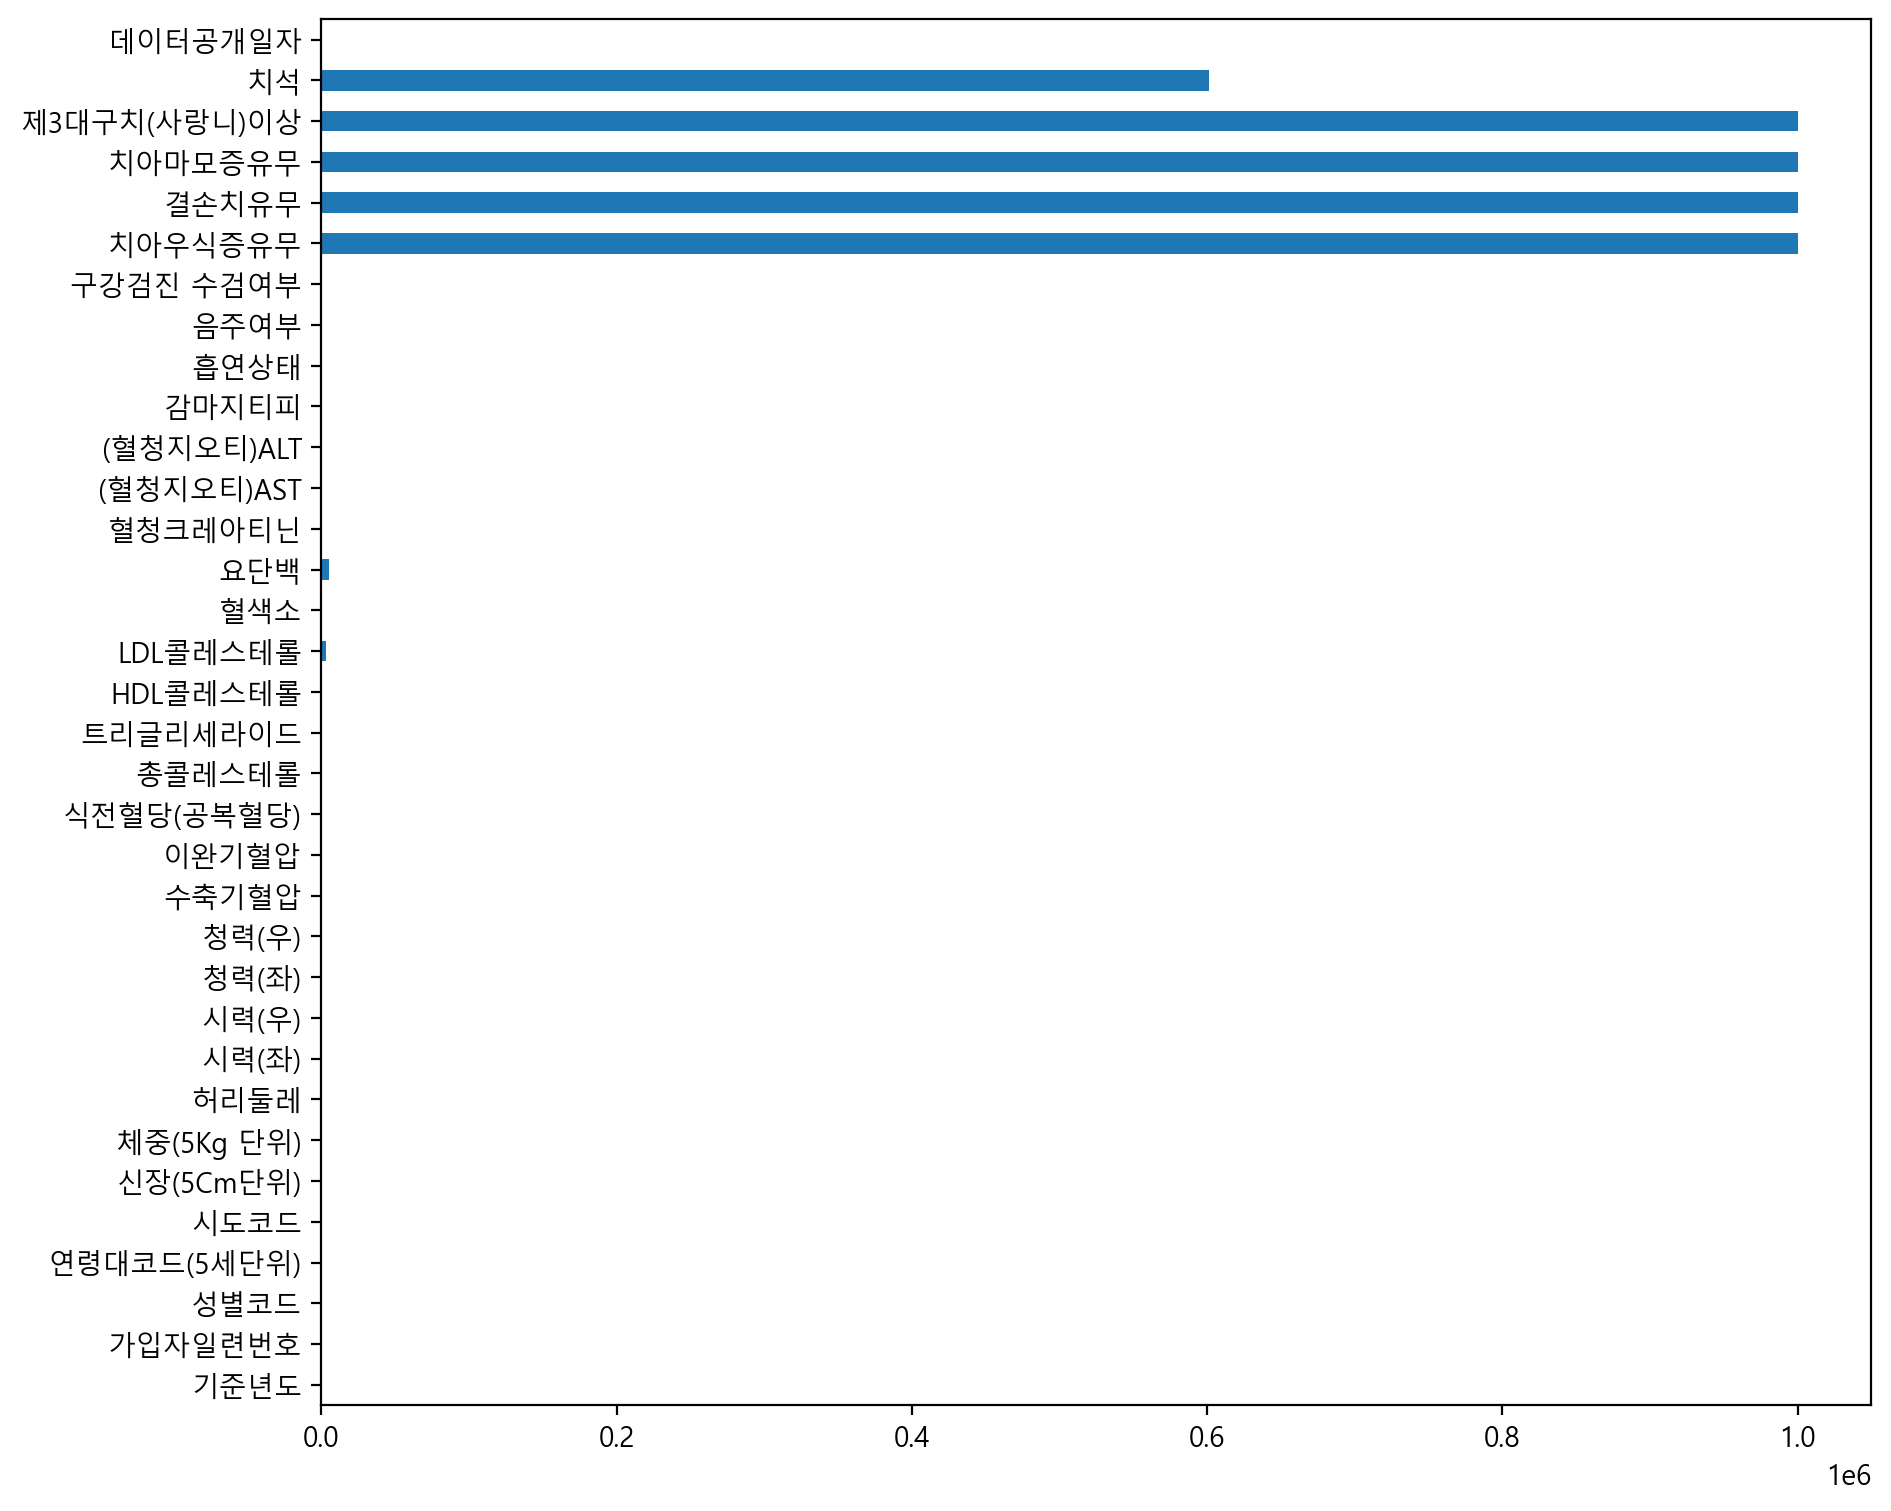

In [13]:
# pandas에 내장된 plot을 통해 시각화를 합니다.
df.isnull().sum().plot.barh(figsize=(10, 9))

# 일부 데이터 요약하기

In [14]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)AST", "(혈청지오티)ALT" 를 가져와 미리보기 합니다.
df[["(혈청지오티)AST", "(혈청지오티)ALT"]].head()

,(혈청지오티)AST,(혈청지오티)ALT
0,19.0,41.0
1,16.0,13.0
2,45.0,62.0
3,21.0,24.0
4,37.0,62.0


In [15]:
# "(혈청지오티)AST", "(혈청지오티)ALT" 를 요약합니다.
df[["(혈청지오티)AST", "(혈청지오티)ALT"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)AST  999958 non-null  float64
 1   (혈청지오티)ALT  999956 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [16]:
df[["(혈청지오티)AST", "(혈청지오티)ALT"]].describe()

,(혈청지오티)AST,(혈청지오티)ALT
count,999958.000000,999956.000000
mean,26.075068,25.859343
std,24.437136,25.814268
min,1.000000,1.000000
25%,19.000000,15.000000
50%,23.000000,20.000000
75%,28.000000,30.000000
max,9999.000000,6710.000000


# value_counts로 값 집계하기

In [17]:
# value_counts를 통해 성별코드로 그룹화하고 개수를 집계합니다.
df["성별코드"].value_counts()

성별코드
1    531172
2    468828
Name: count, dtype: int64

In [18]:
# value_counts를 통해 흡연상태로 그룹화하고 개수를 집계합니다.
df["흡연상태"].value_counts()

흡연상태
1.0    608587
3.0    215061
2.0    176192
Name: count, dtype: int64

# groupby와 pivot_table 사용하기

## groupby

In [19]:
# groupby를 통해 데이터를 그룹화합니다.
# 성별코드로 그룹화한 데이터를 세어봅니다.
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [20]:
# 성별코드와 음주여부로 그룹화를 하고 개수를 세어봅니다.
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [22]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [23]:
# agg를 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

## pivot_table

In [24]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [25]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df, index="음주여부", values="감마지티피")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [26]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해줄 수도 있습니다
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="count")

,감마지티피
음주여부,
0.0,502698
1.0,496732


In [27]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다.
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["count", "median"])

,count,median
,감마지티피,감마지티피
음주여부,,
0.0,502698,19.0
1.0,496732,30.0


In [28]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [29]:
# 성별코드, 음주여부에 따른 감마지티피 값의 평균을 구합니다
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 전체 데이터 시각화하기
- 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.
- 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을 하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

## 히스토그램
- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어진 것을 확인할 수 있었습니다.
- 히스토그램을 사용하면 수치데이터를 bin의 개수만큼 그룹화하여 도수분포표를 만들고 그 결과를 시각화합니다.
- 이 데이터에서는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

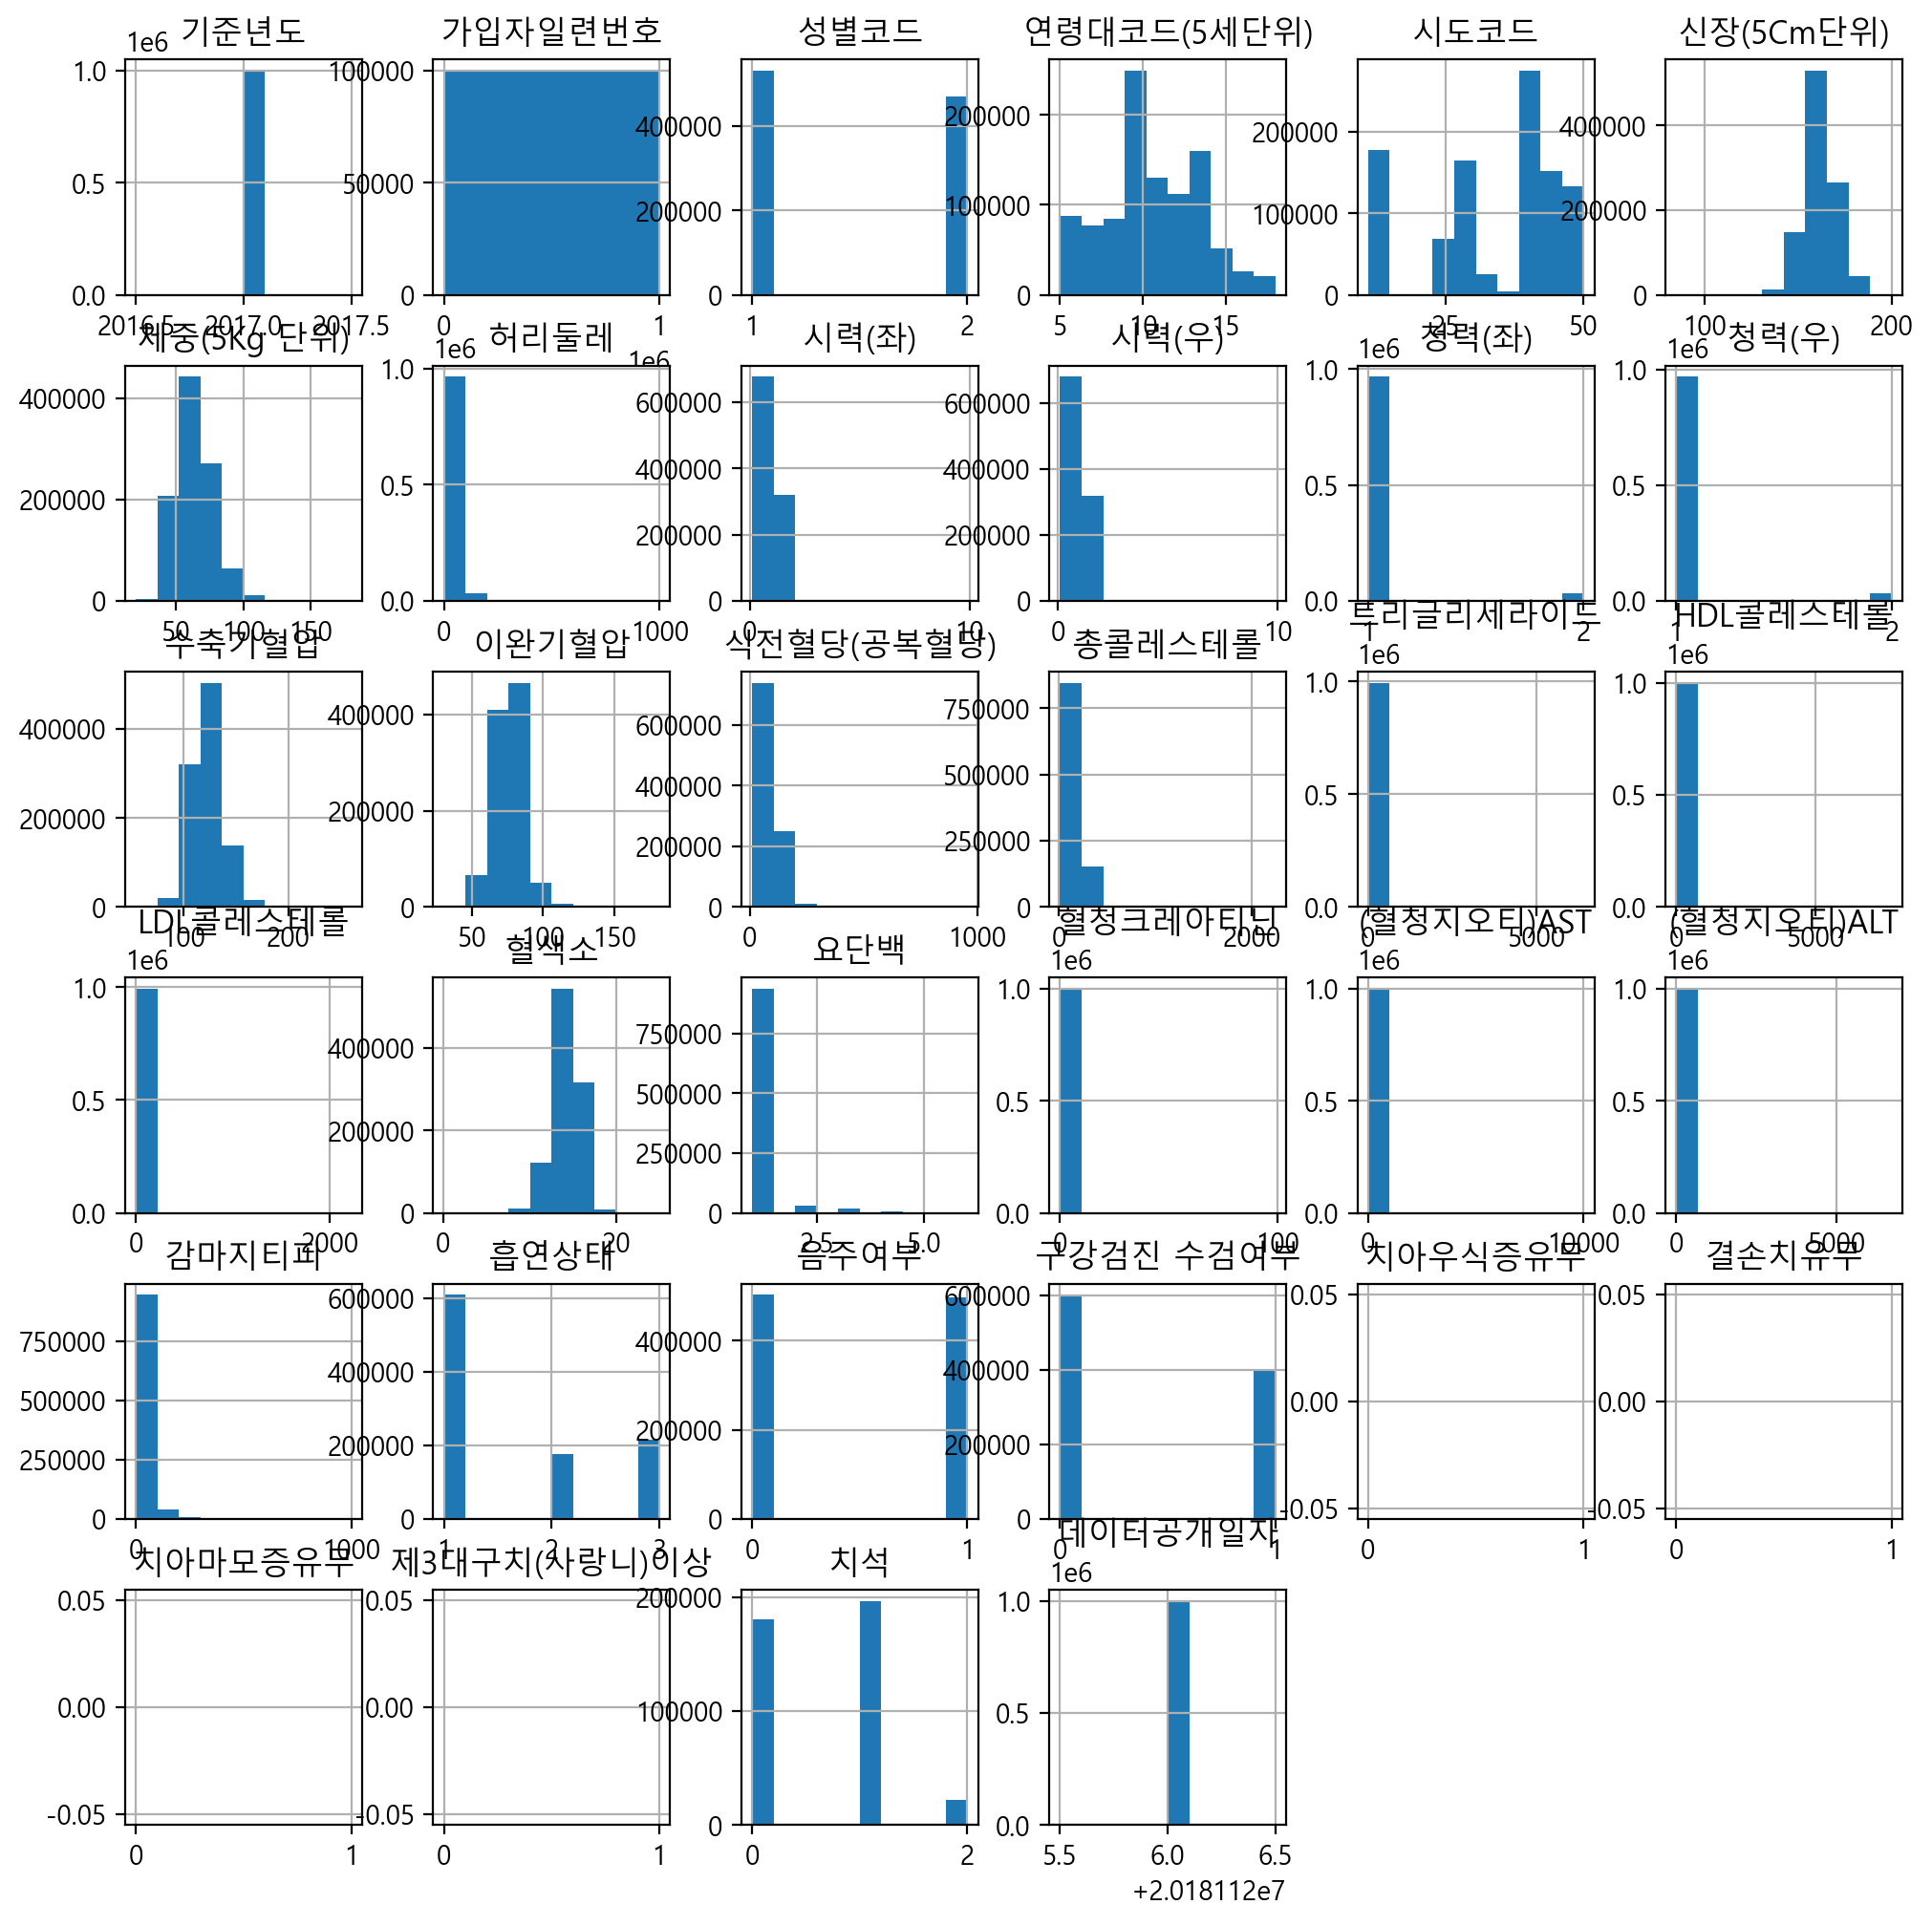

In [30]:
# 전체 데이터에 대한 히스토그램을 출력합니다.

h = df.hist(figsize=(12, 12))

## 슬라이싱을 사용해 히스토그램
- 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
- 슬라이싱 사용 시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
- iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]를 사용합니다.
- 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인덱스:끝나는인덱스(+1)를 지정할 수 있습니다.

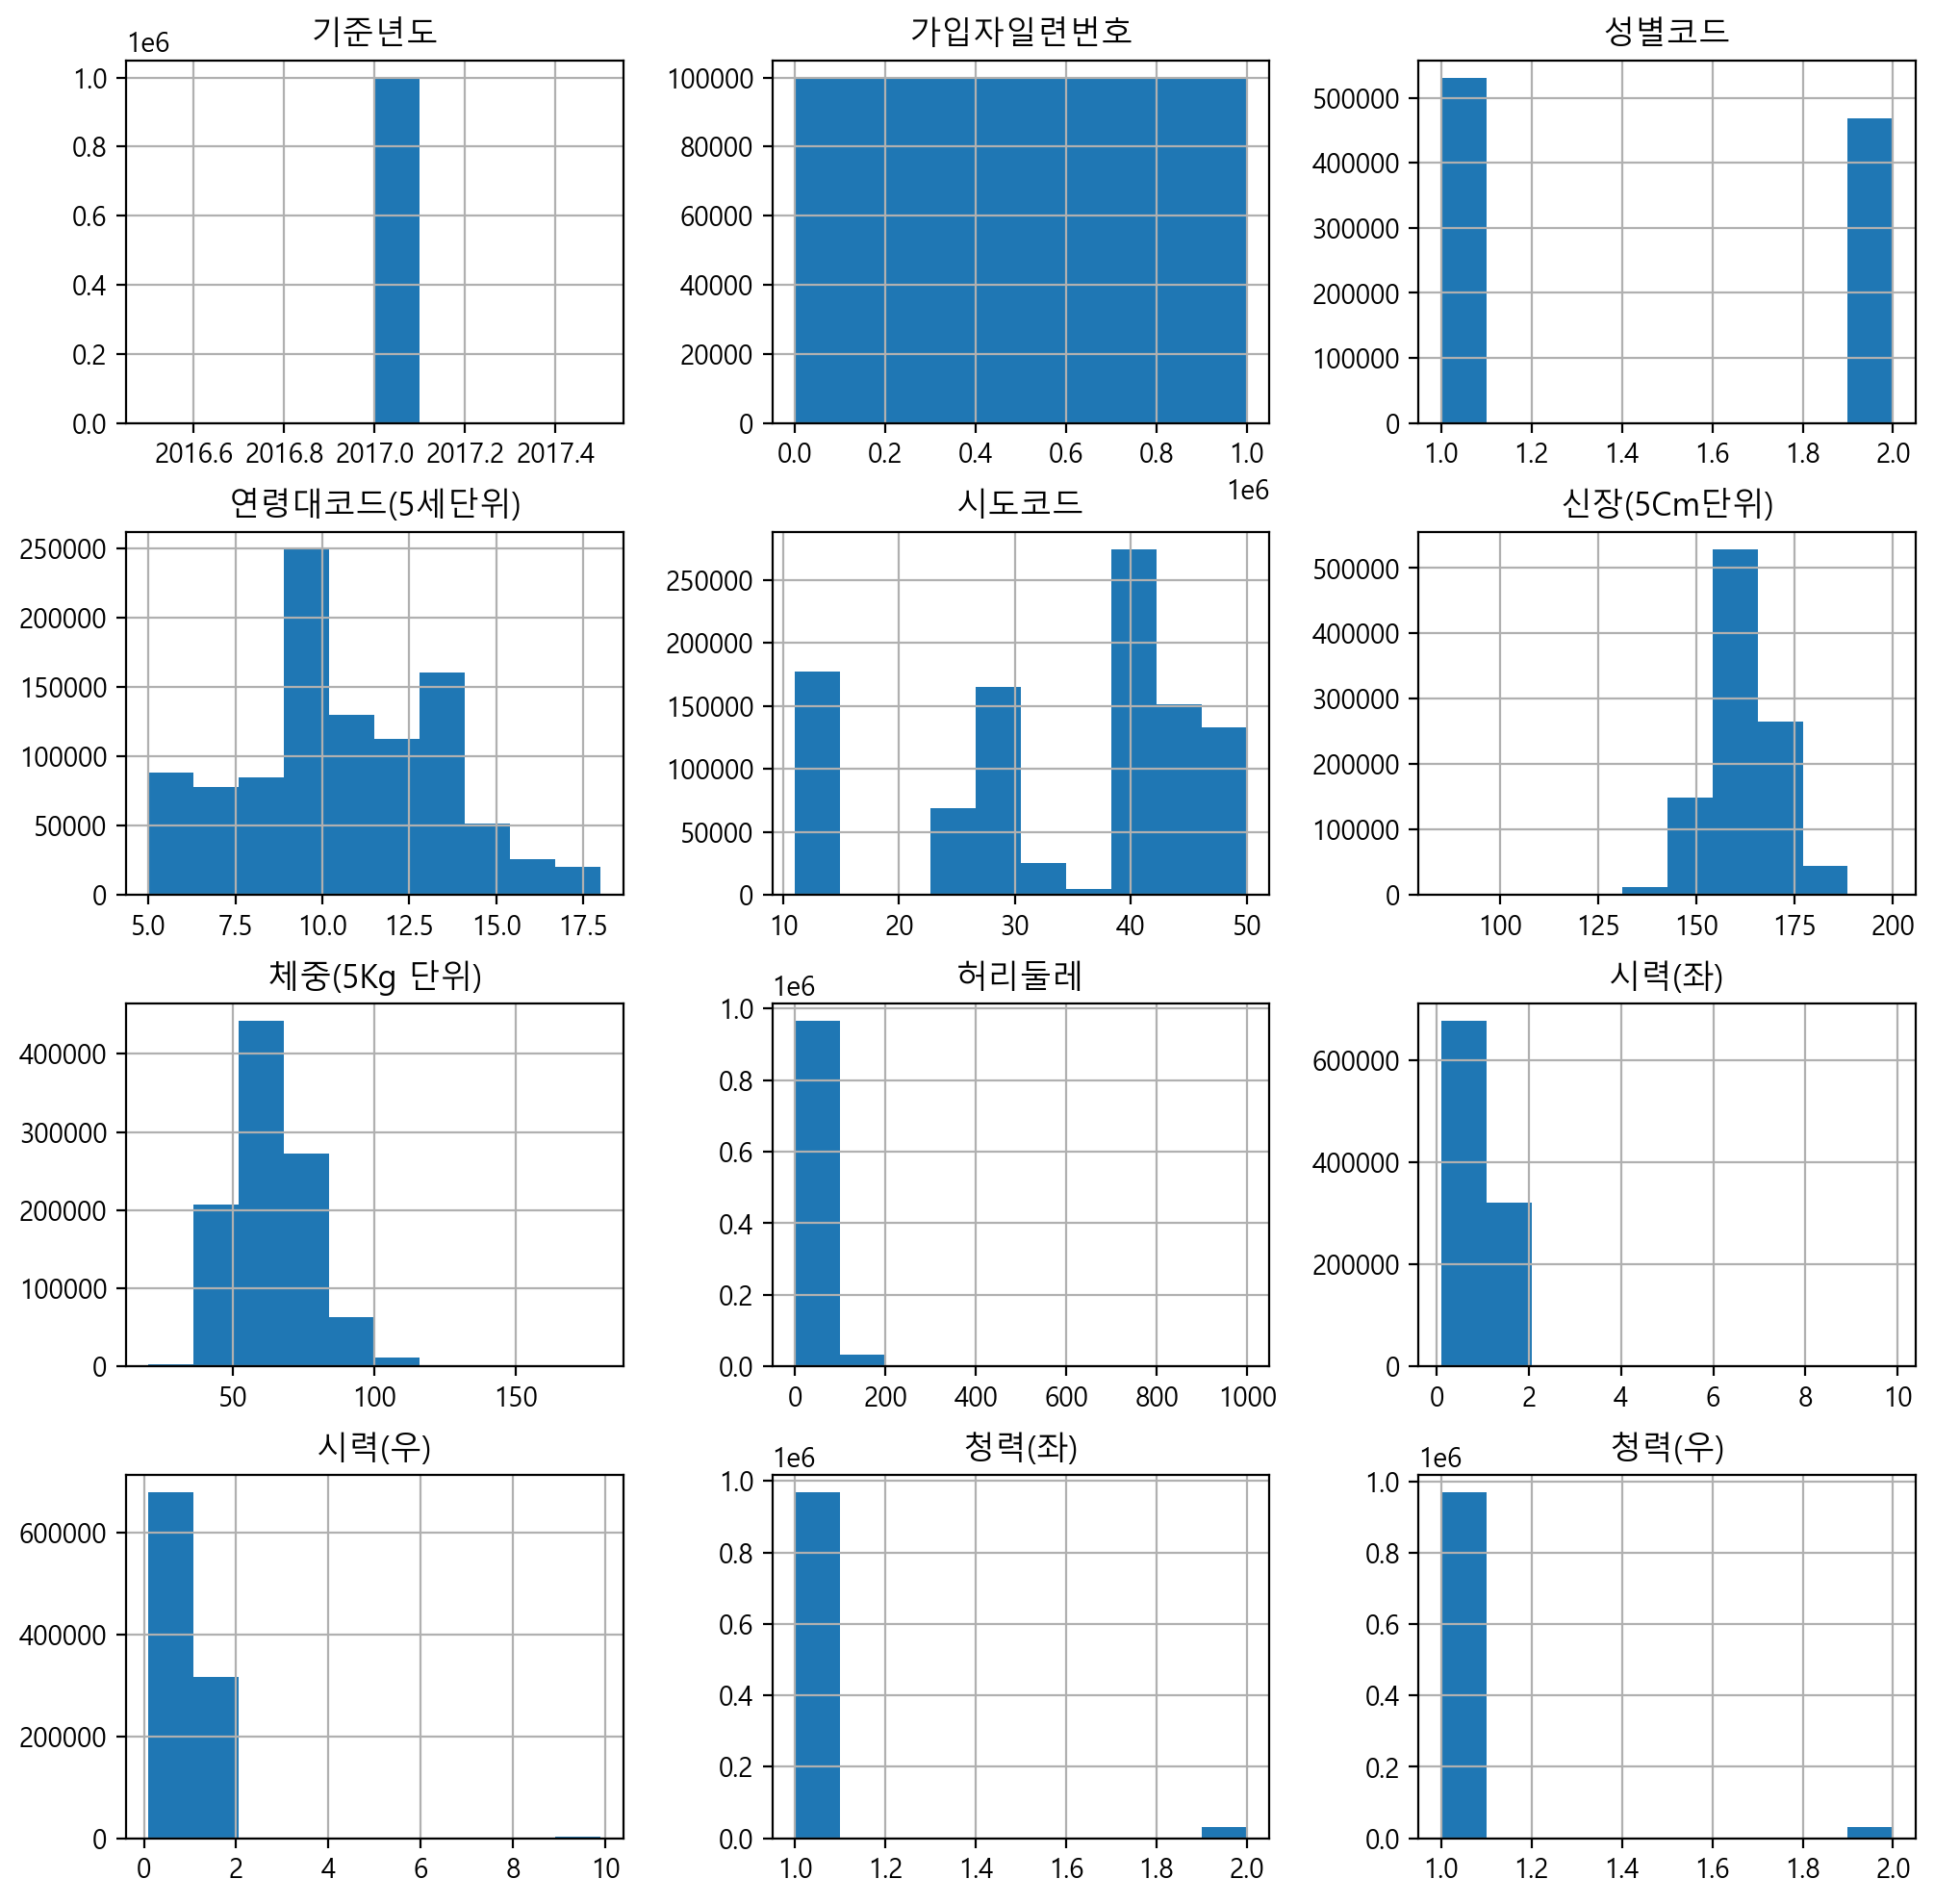

In [31]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:,:12].hist(figsize=(12, 12))

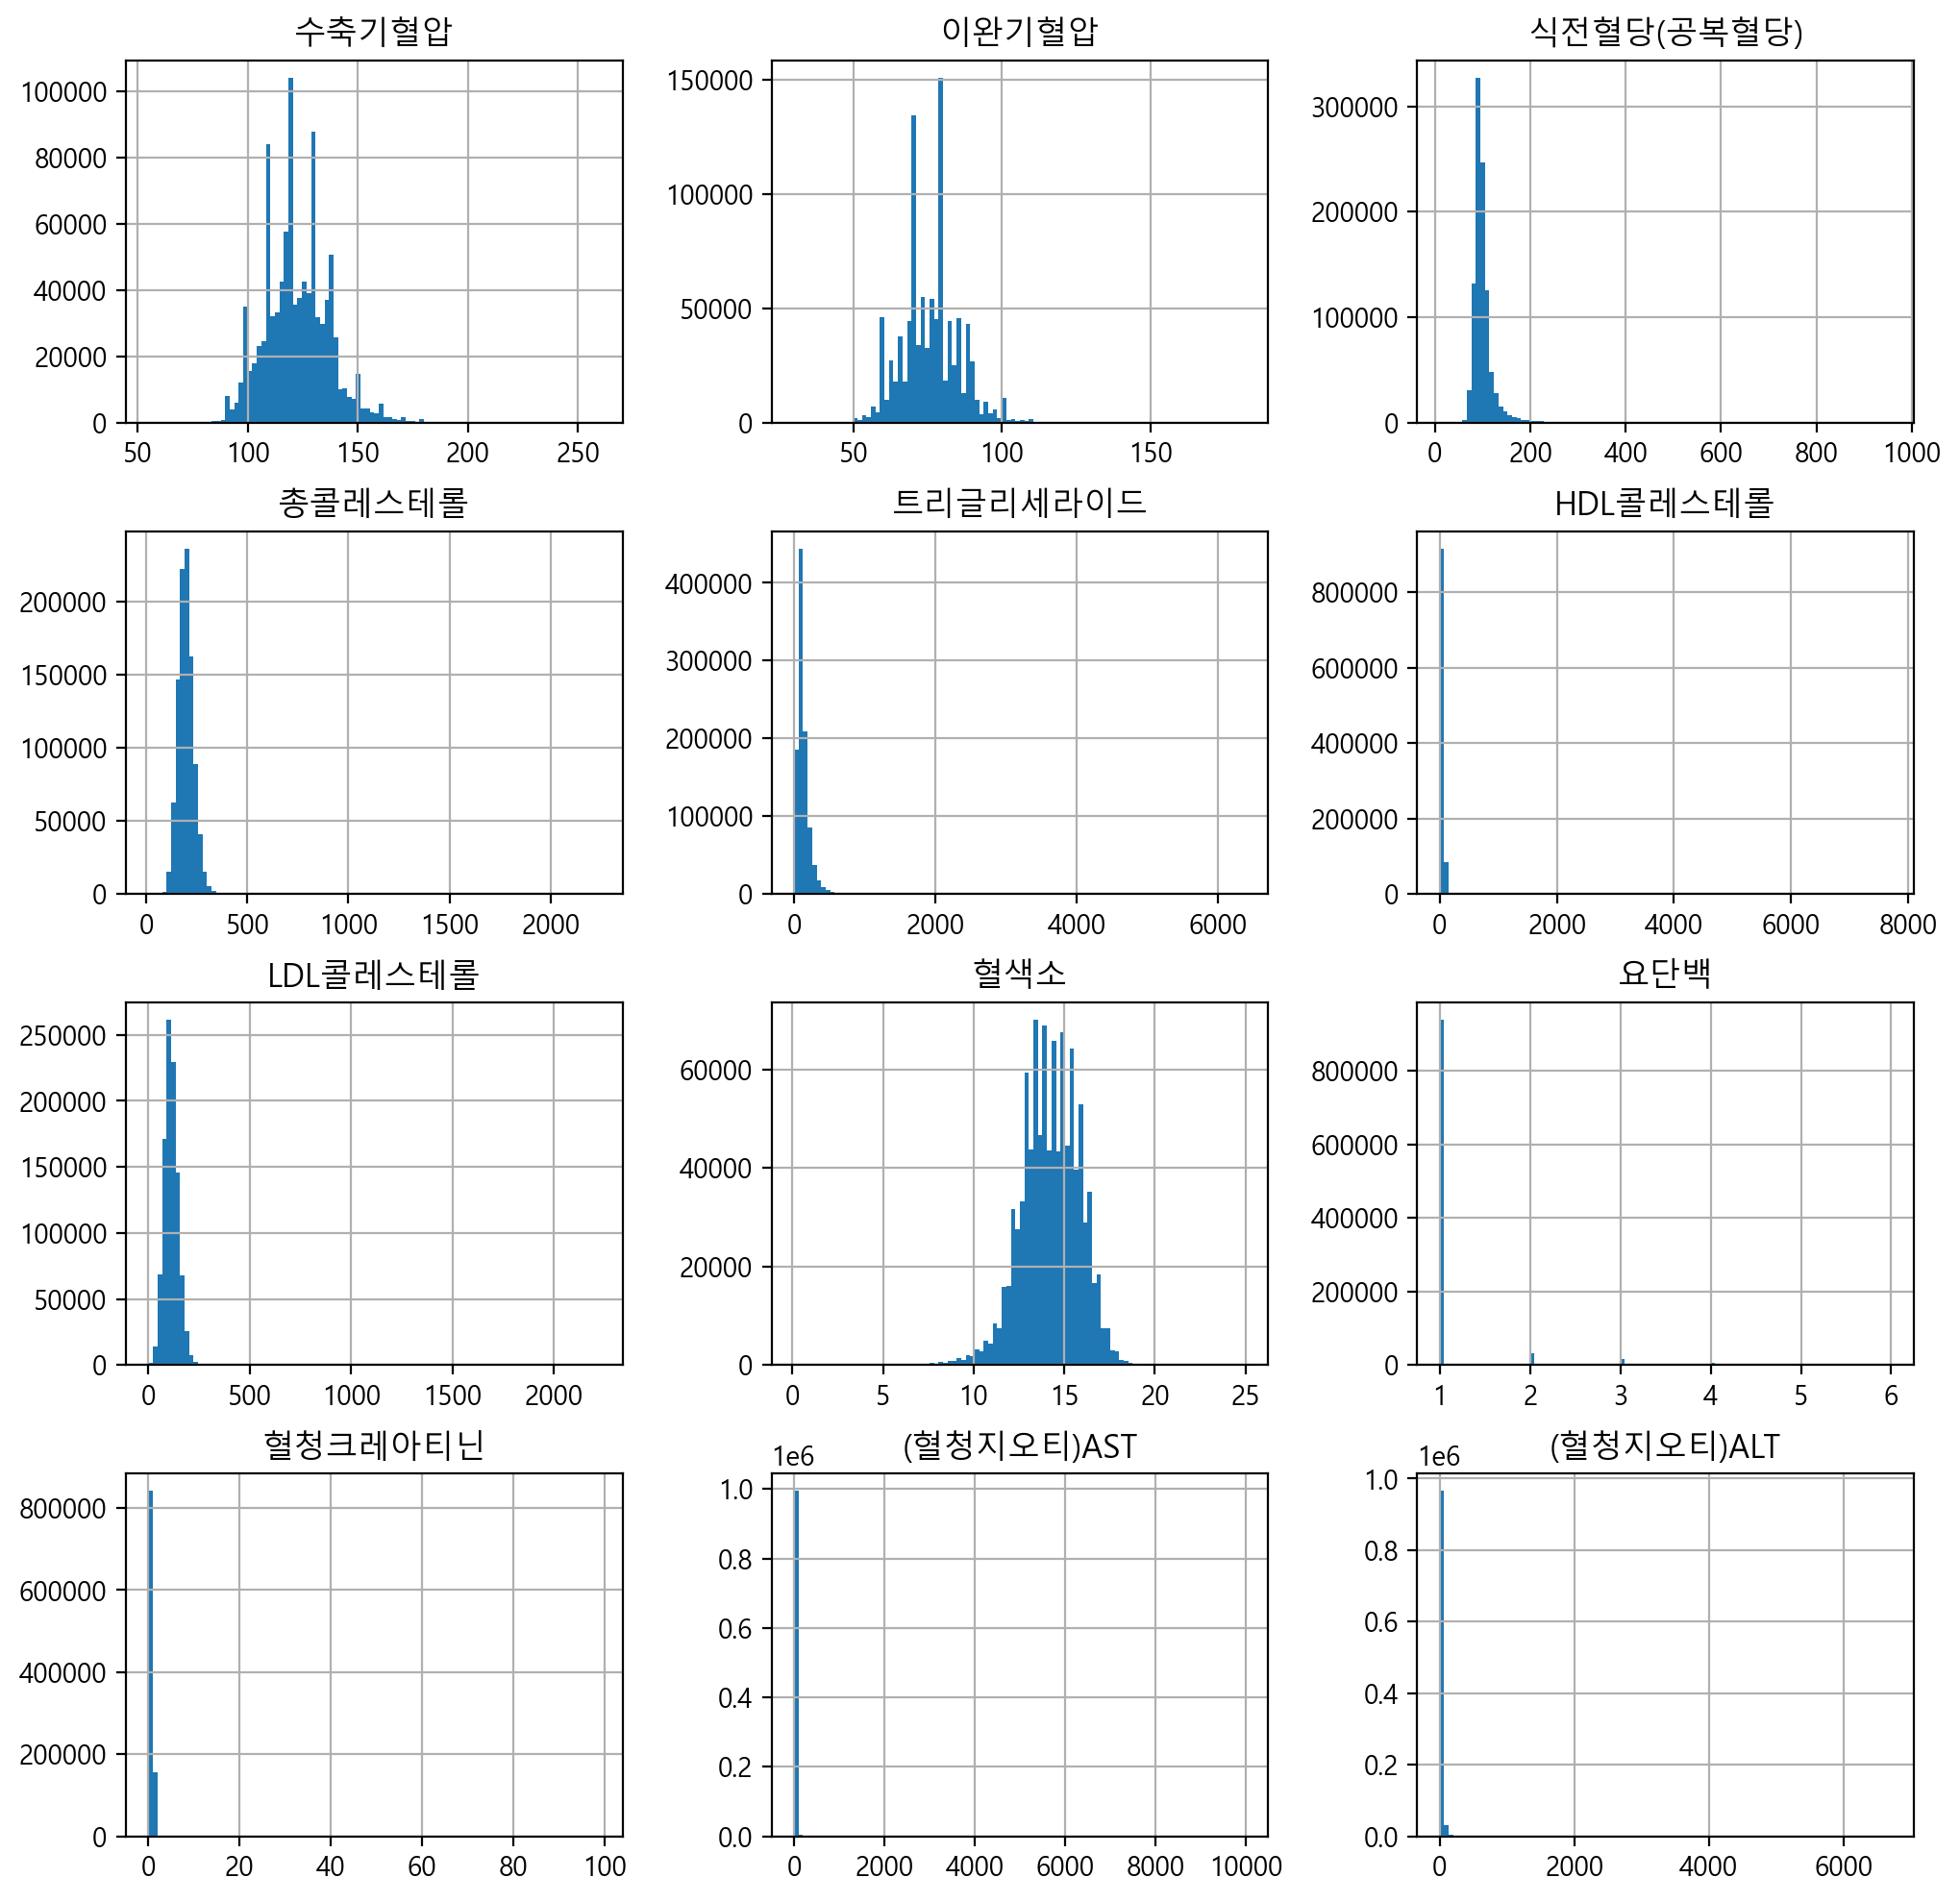

In [32]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

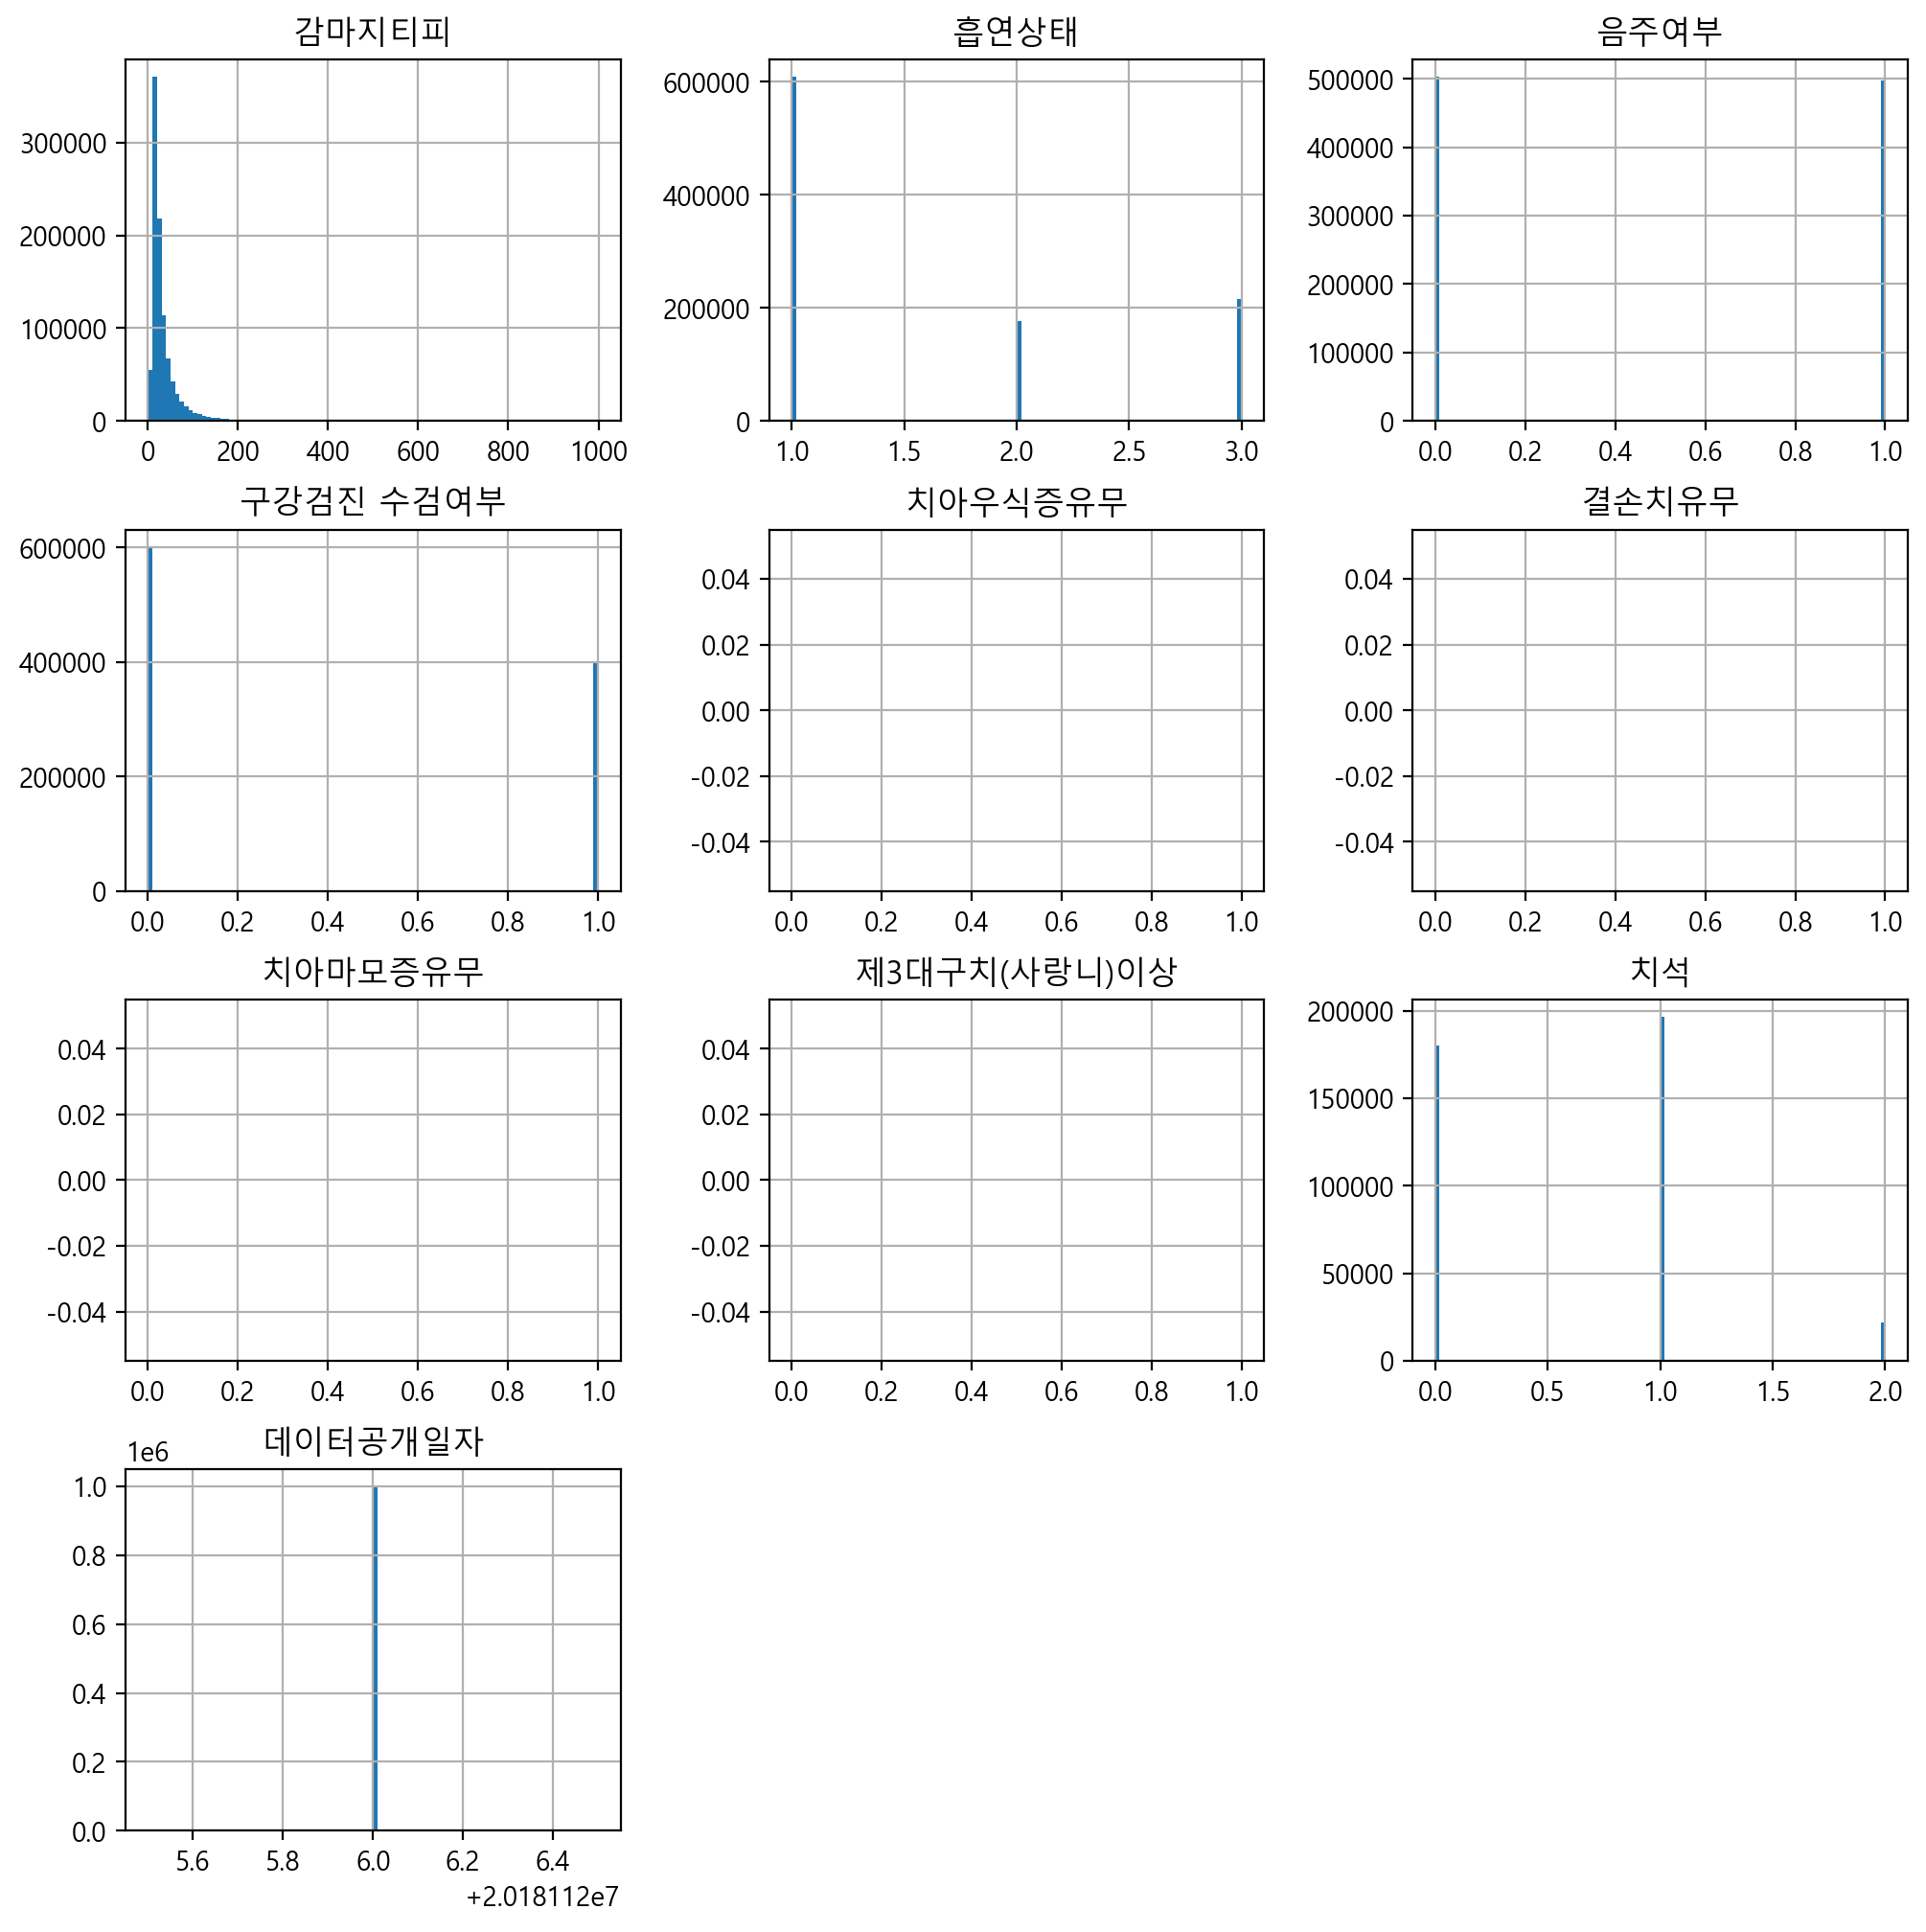

In [33]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=100)